# Udacity Lesson 3 Ticket example

Using the data from 'Simple Linear Regression.xlsx' presented in Lesson 3.9 we will do a linear regression.
In this example we will use python libraries for data science and machine learning.
If you are interested in the math behind the used API-functions here, have a look at the files

- https://github.com/jegali/DataScience/blob/main/linear_regression.ipynb
- https://github.com/jegali/DataScience/blob/main/linear_regression_2.ipynb

in my github space where I explain the math and implementation in python


This is the file content of:  simple-linear-regression.xlsx
 
    Number of Employees  Average Number of Tickets
0                    51                          1
1                    68                          9
2                    67                         20
3                   124                          1
4                   124                          8
5                   134                         30
6                   157                         20
7                   190                          8
8                   205                         20
9                   230                         50
10                  265                         35
11                  296                         65
12                  336                         35
13                  359                         60
14                  403                         85
15                  418                         40
16                  437                         75
17                  

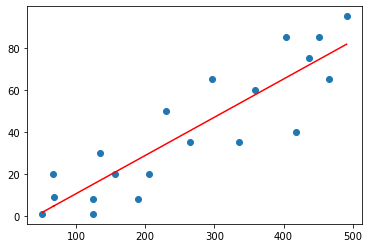

 
Linear Regression information:
 
slope: 		 0.181735830867848
intercept: 	 -7.5464782252213425
r_value: 	 0.8866832281944961
r_squared: 	 0.7862071471614128
p_value: 	 1.9262382307620749e-07
std_err: 	 0.022337388916829192
 
Linear Regression formula: y = + 0.181735830867848 * x - 7.5464782252213425
 
To get the number of tickets, insert 525 for x in the regression formula. Y is the number of tickets.
 
Ticket per week for a new client with 525 employees:  88


In [60]:
# a reference to the pandas library
import pandas as pd

# To visualize the data
import matplotlib.pyplot as plt  

# This is new. Let's try a library which does 
# the linear regression for us
from sklearn.linear_model import LinearRegression
# for calculation of correlation metrics
from sklearn import metrics

# This is also new. We have more than one library to 
# do the regression for us. And scipy also does
# correlation calculation and other stuff for us
from scipy import stats

import math

# the excel file must be in the same directory as this notebook
excel_file= 'simple-linear-regression.xlsx'

# via pandas, the contents ae read into a variable or data frame named data
data = pd.read_excel(excel_file)

# get the length of entries in the file 
# and print out the data
entries = len(data)
data.head(entries)
print("This is the file content of: ", excel_file)
print (" ")
print(data)

# The task states we have to find a number of tickets.
# This makes the number of tickets the target variable,
# so the number of tickets has to be on the y axis,
# fixing the number of employees to the x axis

# create an object for linear regression from sklearn
linear_regressor = LinearRegression()  

# convert the values in an array that fits the function's need
X = data['Number of Employees'].values.reshape(-1, 1)
Y = data['Average Number of Tickets'].values.reshape(-1, 1)

# and do the regression calculation with sklearn
linear_regressor.fit(X,Y)
# make predictions on Y based on X
Y_pred = linear_regressor.predict(X)

print(" ")
print("The data as a scatter plot with regression line")
# scatter plot
plt.scatter(X, Y)
# linear regression function
plt.plot(X, Y_pred, color='red')

# show the graphs
plt.show()

# using the stats module from scipy for linear regression
# this does exactly the same as the sklearn functions
# put scipy conveniently calculates ...
slope, intercept, r_value, p_value, std_err = stats.linregress(data[data.columns[0]], data[data.columns[1]])
print(" ")
print("Linear Regression information:")
print(" ")
print("slope: \t\t", slope)
print("intercept: \t", intercept)
print("r_value: \t" , r_value)
print("r_squared: \t", r_value**2)
print("p_value: \t", p_value)
print("std_err: \t", std_err)
print(" ")
formula_str = "Linear Regression formula: y ="

if (slope < 0):
    formula_str += " - {} * x"
else:
    formula_str += " + {} * x"

if (intercept < 0):
    formula_str += " - {}"
else:
    formula_str += " + {}"
    
print(formula_str.format(abs(slope),abs(intercept)))

# prediction for 525 employees is 88 tickets
tickets_pred = slope * 525 + intercept
print (" ")
print ("To get the number of tickets, insert 525 for x in the regression formula. Y is the number of tickets.")
print (" ")
print ("Ticket per week for a new client with 525 employees: ", round(tickets_pred))